# Exploratory Data Analysis
O objetivo do seguinte projeto é a criação de um preditor de localização subcelular. Mais especificamente, um preditor que diferencia proteínas de membrana de proteinas citoplasmáticas. Esse tipo de análise é muito utilizado em bioinformática, sendo utilizado por exemplo em análises de vacinologia reversa ou prospecção de alvos para fármacos.

Este projeto visa fazer a predição com base na composição de aminoácidos da proteína. Visto que os aminoácidos possuem propriedades físico-químicas diferentes, a composição de aminoácidos permite uma visão inicial de onde a proteína pode estar localizada. Por exemplo, uma proteína de membrana deve possuir uma maior quantidade de aminoácidos hidrofóbicos para interagir com a parte hidrofóbica da bicamada lipídica, enquanto uma proteína citoplasmática deve possuir uma quantidade maior de aminoácidos hidrofílicos para se manter no meio aquoso do citoplasma.

## Data Colection

In [1]:
#!curl --output ../data/raw/membrane.fasta  'https://www.uniprot.org/uniprot/?query=locations%3A%28location%3Amembrane%29+taxonomy%3Abacteria&sort=score&format=fasta&limit=10000'
#!curl --output ../data/raw/cytoplasm.fasta 'https://www.uniprot.org/uniprot/?query=locations%3A%28location%3Acytoplasm%29+taxonomy%3Abacteria&sort=score&format=fasta&limit=10000'

## Data processing

In [2]:
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import pandas as pd

In [3]:
def compute_aa_composition(protein_sequence):
    analyzer = ProtParam.ProteinAnalysis(str(protein_sequence))
    return analyzer.get_amino_acids_percent()

In [ ]:
df = pd.DataFrame()

handle = open('../data/raw/membrane.fasta')
parser = SeqIO.parse(handle, 'fasta')

for protein in parser:
    protein_data = compute_aa_composition(protein.seq)
    protein_data['membrane'] = 1
    df = df.append([protein_data], ignore_index=True)
    
handle = open('../data/raw/cytoplasm.fasta')
parser = SeqIO.parse(handle, 'fasta')

for protein in parser:
    protein_data = compute_aa_composition(protein.seq)
    protein_data['membrane'] = 0
    df = df.append([protein_data], ignore_index=True)

In [5]:
df

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,membrane
0,0.308789,0.004751,0.047506,0.106888,0.014252,0.049881,0.002375,0.033254,0.156770,0.045131,...,0.026128,0.023753,0.047506,0.021378,0.052257,0.014252,0.019002,0.002375,0.011876,1
1,0.072368,0.006579,0.085526,0.052632,0.026316,0.085526,0.026316,0.085526,0.046053,0.072368,...,0.006579,0.059211,0.032895,0.065789,0.046053,0.039474,0.105263,0.026316,0.026316,1
2,0.039340,0.004230,0.075296,0.070643,0.055415,0.054569,0.009729,0.104907,0.076988,0.085871,...,0.096870,0.024112,0.024958,0.019459,0.076988,0.051607,0.047377,0.006768,0.060068,1
3,0.143204,0.021845,0.019417,0.016990,0.067961,0.131068,0.004854,0.060680,0.036408,0.109223,...,0.009709,0.063107,0.019417,0.026699,0.036408,0.063107,0.050971,0.033981,0.043689,1
4,0.111597,0.007659,0.050328,0.063457,0.020788,0.050328,0.016411,0.060175,0.025164,0.145514,...,0.038293,0.033917,0.094092,0.066740,0.066740,0.055799,0.049234,0.008753,0.013129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.144737,0.010965,0.050439,0.074561,0.024123,0.105263,0.019737,0.067982,0.041667,0.078947,...,0.030702,0.032895,0.015351,0.070175,0.052632,0.046053,0.094298,0.004386,0.019737,0
19996,0.078431,0.015251,0.047930,0.076253,0.021786,0.089325,0.034858,0.080610,0.071895,0.067538,...,0.056645,0.026144,0.037037,0.028322,0.065359,0.069717,0.089325,0.000000,0.028322,0
19997,0.085153,0.017467,0.045852,0.080786,0.019651,0.093886,0.026201,0.069869,0.069869,0.063319,...,0.048035,0.032751,0.048035,0.037118,0.050218,0.069869,0.104803,0.000000,0.026201,0
19998,0.123620,0.011038,0.072848,0.041943,0.015453,0.103753,0.019868,0.057395,0.039735,0.088300,...,0.046358,0.039735,0.037528,0.057395,0.028698,0.075055,0.108168,0.006623,0.019868,0


## Exploratory Data Analysis

In [6]:
df_grouped = df.groupby('membrane').mean()
df_grouped

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
membrane,,,,,,,,,,,,,,,,,,,,
0,0.099596,0.011595,0.056743,0.065825,0.026850,0.088984,0.026117,0.066100,0.054264,0.085344,0.020248,0.043467,0.038655,0.034842,0.052431,0.051365,0.060162,0.086719,0.005711,0.024890
1,0.105680,0.009934,0.057090,0.052834,0.040773,0.083558,0.024819,0.059536,0.038595,0.097306,0.028529,0.032032,0.049913,0.035478,0.054802,0.053191,0.054195,0.078225,0.016940,0.026497


Populating the interactive namespace from numpy and matplotlib


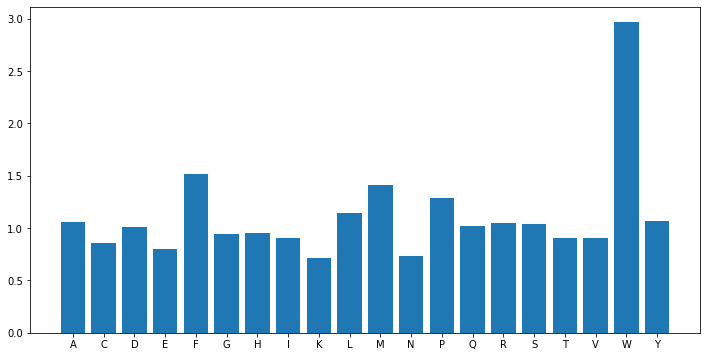

In [7]:
%pylab inline

pylab.rcParams['figure.figsize'] = (12, 6)
aminoacids = df_grouped.columns

cytoplasm_mean_composition = df_grouped.loc[0]
membrane_mean_composition  = df_grouped.loc[1]

relative_difference = membrane_mean_composition / cytoplasm_mean_composition

plt.bar(aminoacids, relative_difference)
plt.show()

### Diferenças observadas:
É possível observar uma predominância do aminoácido **triptofano** em proteínas de **membrana**. O triptofano é um aminoácido hidrofóbico, ou seja, tem pouca interação com moléculas de água. Isto demonstra a maior predominância de um aminoácido hidrofóbico em proteínas que interagem com a membrana. Tendo isto em vista, a hipótese inicial, de que proteínas de membrana possuem mais aminoácidos hidrofóbicos pela interação com a bicamada lipídica, não foi rejeitada.

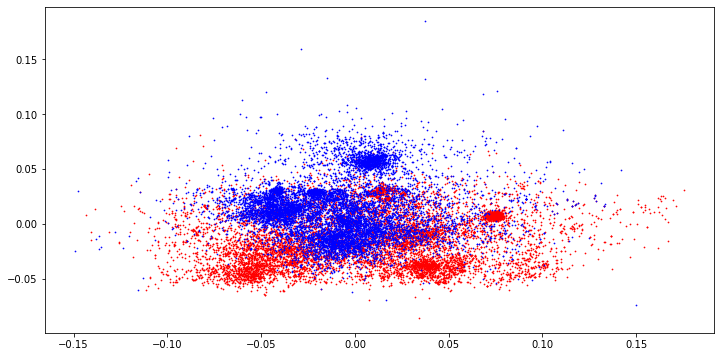

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.drop(['membrane'], axis=1))

for group, df_group in df.groupby('membrane'):
    components = pca.transform(df_group.drop('membrane', axis=1))
    plt.scatter(
        components[:,0],
        components[:,1],
        s=0.5,
        label='Membrane' if group == 0 else 'Cytoplasm',
        color='red' if group == 0 else 'blue'
    )

plt.show()

### Resultados da análise PCA:
De acordo com a análise PCA, não é possível separar as proteínas de membrana das proteínas citoplasmáticas de forma eficiente, devido as zonas onde existem sobreposições. Porém a existencia de grupos bem definidos demonstra que é possível separar grupos exclusivos de uma localização subcelular de outra.

## Model Training

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['membrane'], axis=1)
y = df['membrane']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Model Validation

In [13]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2439
           1       0.95      0.94      0.95      2561

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



### Análise do Report:

O modelo de Random Forest apresentou uma acurácia de 95%, o que representa que o modelo conseguiu prever corretamente 95% dos dados utilizados no teste. Estes resultados demonstram um resultado de predição do modelo bom, sendo considerado aceitável acima de 80%. A utilização de Árvores de Decisão é indicada para dados tabulares, podendo ser a explicação para a boa atuação do modelo.

O modelo apresentou ainda precisão de 94% para os dados de proteínas citoplasmáticas e 95% para os dados de proteínas de membrana. Isso significa que ele foi um pouco mais efetivo em prever falsos positivos em dados de proteínas de membrana do que em dados de proteínas citoplasmáticas. Visto que a precisão mede quantos negativos verdadeiros (negativos armazenados em y_test) foram ditos como negativos pelo modelo (negativos armazenados em y_pred).

Já para o recall, os resultados foram invertidos. Obteve-se um recall de 95% para os dados de proteínas citoplasmáticas e de 94% para os dados de proteínas de membrana. Demonstrando que ele foi um pouco mais efetivo em prever falsos negativos em dados de proteínas citoplasmáticas do que em dados de proteínas de membrana. Isto se deve ao fato do recall medir quantos positivos verdadeiros (positivos armazenados em y_test) foram ditos como positivos pelo modelo (positivos armazenados em y_pred).